# Objective:
### See how important other nominatons are in predicitng the best picture award for the Oscars
#### Note: If you want to see how I cleaned the datasets I will be working on go to: https://github.com/jkp22/PortfolioProjects/blob/main/Oscars_EDA.ipynb

In [1]:
# Loading the packages
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r'C:\Users\kylep\Documents\Work things\Projects\Python\Oscars\movie_data.csv')

In [3]:
df.drop(['Unnamed: 0','Title',
         'Viewership_Rating','Country of Origin','Production Company','Genre 1','Genre 2','Genre 3',
        'IMDb Rating','Duration','adj_Budget','movie_number'], axis=1, inplace=True)
df

,Date,Best Actress in a Leading Role,Best Director,Best Adapted Screenplay,Best Art Direction,Best Actor in a Leading Role,Best Original Screenplay,Best Cinematography,Best Sound Mixing,Best Film Editing,...,Best Original Score,Best Actress in a Supporting Role,Best Actor in a Supporting Role,Best Visual Effects,Best Costume Design,Best Foreign Language Film,Best Makeup,Best Sound Editing,Best Animated Feature Film of the Year,Winner
0,1927,True,True,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1929,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,1928,False,True,False,False,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1928,False,True,False,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1929,False,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,2021,False,False,False,False,True,True,False,False,True,...,False,True,False,False,False,False,False,False,False,False
559,2021,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
560,2021,False,False,False,True,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
561,2021,False,True,True,True,True,False,True,True,True,...,True,True,True,False,False,False,False,False,False,False


In [4]:
from sklearn.preprocessing import LabelEncoder
for col in df.columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
df.head() #Shows that the dataset has been encoded. Although Majoirty of features were already boolean types it doesnt hurt to encode the rest 

,Date,Best Actress in a Leading Role,Best Director,Best Adapted Screenplay,Best Art Direction,Best Actor in a Leading Role,Best Original Screenplay,Best Cinematography,Best Sound Mixing,Best Film Editing,...,Best Original Score,Best Actress in a Supporting Role,Best Actor in a Supporting Role,Best Visual Effects,Best Costume Design,Best Foreign Language Film,Best Makeup,Best Sound Editing,Best Animated Feature Film of the Year,Winner
0,0,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,1,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.columns

Index(['Date', 'Best Actress in a Leading Role', 'Best Director',
       'Best Adapted Screenplay', 'Best Art Direction',
       'Best Actor in a Leading Role', 'Best Original Screenplay',
       'Best Cinematography', 'Best Sound Mixing', 'Best Film Editing',
       'Best Original Song', 'Best Original Score',
       'Best Actress in a Supporting Role', 'Best Actor in a Supporting Role',
       'Best Visual Effects', 'Best Costume Design',
       'Best Foreign Language Film', 'Best Makeup', 'Best Sound Editing',
       'Best Animated Feature Film of the Year', 'Winner'],
      dtype='object')

## Since I know later on I will be doing some sort of group cross-validation I need a group variable. The reason I made the date the group is that each year is unquie and wanted to valdiate my data on the year

In [6]:
X = df.drop(['Date', 'Winner'], axis=1) 
y = df['Winner']
Group = df['Date']

In [7]:
X_tr,X_val,y_tr,y_val = train_test_split(X,y,test_size=.2)

## I will be using two models:
- Logistic Regression
- Decision tree classifier

## Logistic Regression

In [8]:
from sklearn.model_selection import StratifiedGroupKFold
from sklearn.feature_selection import RFE
sgk =  StratifiedGroupKFold(n_splits=10,shuffle=True, random_state=99)


fold = 0
accs = []
aucs = []
coef = []
for train_idx,val_idx in sgk.split(X,y,Group):
    X_tr = X.loc[train_idx] #Creating train and validation variables
    y_tr = y.loc[train_idx]
    
    X_val = X.loc[val_idx]
    y_val = y.loc[val_idx] 
    
    #Fit model on Train
    log_reg = LogisticRegression(random_state = 99) #Using Logistic Regression
    select = RFE(log_reg, n_features_to_select=8) #To aviod overfitting via too many features I apply recursive feature elimination
    select.fit(X_tr,y_tr) #fitting the train variables
    select.transform(X_tr) #Transforming the data into only the 8 selected features
    pred = select.predict(X_val) 
    pred_prob = select.predict_proba(X_val)[:,1]
    acc_score = accuracy_score(y_val, pred)
    auc_score = roc_auc_score(y_val, pred_prob)
    
    print(f"====================================== Fold {fold} =============================================")
    print(
        f"Our accuracy on the validation set is\033[1m {acc_score:0.4f}\033[0m and AUC is \033[1m{auc_score:0.4f}\033[0m")
    #Showing which features were selected per fold
    f_list = pd.DataFrame({'Feature': select.feature_names_in_,
                            'Selected': select.support_,
                            'Ranking': select.ranking_,
                           

                            
                              })
    f_sel = f_list[(f_list["Selected"] == True)]
    f_sel  = f_sel.reset_index(drop='index')
    f_sel['Coefficient'] = select.estimator_.coef_.reshape(8)
    print(f_sel.sort_values(by='Coefficient',ascending=False))
    fold += 1
    accs.append(acc_score)
    aucs.append(auc_score)
    coef.append(f_sel[['Feature','Coefficient']])

====================================== Fold 0 =============================================
Our accuracy on the validation set is 0.8621 and AUC is 0.8229
                           Feature  Selected  Ranking  Coefficient
0                    Best Director      True        1     1.712914
4                Best Film Editing      True        1     1.372967
1          Best Adapted Screenplay      True        1     0.906062
3         Best Original Screenplay      True        1     0.902708
5  Best Actor in a Supporting Role      True        1     0.611344
2     Best Actor in a Leading Role      True        1     0.562545
6              Best Costume Design      True        1     0.442441
7                      Best Makeup      True        1     0.364480
====================================== Fold 1 =============================================
Our accuracy on the validation set is 0.8750 and AUC is 0.7747
                           Feature  Selected  Ranking  Coefficient
0                   

In [9]:
out_of_fold = np.mean(aucs)
print(f' The out of fold AUC is \033[1m{out_of_fold}')

 The out of fold AUC is 0.8198405343120786


In [10]:
avg_acc = np.mean(accs)
print(f' The accuracy of the model is \033[1m{avg_acc}')

 The accuracy of the model is 0.8341594536779795


In [11]:
d = {}
for x in range(len(coef)):
    d[x] = pd.DataFrame(coef[x])


In [12]:
feat_df = d[0].merge(d[1], on='Feature',how='outer') 
for y in range(len(coef)-2):
    feat_df = feat_df.merge(d[y], on='Feature',how='outer') 

C:\Users\kylep\AppData\Local\Temp\ipykernel_5168\1260271240.py:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Coefficient_x'} in the result is deprecated and will raise a MergeError in a future version.
  feat_df = feat_df.merge(d[y], on='Feature',how='outer')
C:\Users\kylep\AppData\Local\Temp\ipykernel_5168\1260271240.py:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Coefficient_x'} in the result is deprecated and will raise a MergeError in a future version.
  feat_df = feat_df.merge(d[y], on='Feature',how='outer')
C:\Users\kylep\AppData\Local\Temp\ipykernel_5168\1260271240.py:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Coefficient_x'} in the result is deprecated and will raise a MergeError in a future version.
  feat_df = feat_df.merge(d[y], on='Feature',how='outer')
C:\Users\kylep\AppData\Local\Temp\ipykernel_5168\1260271240.py:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Coefficient_x'} in 

In [13]:
feat_df['mean'] = feat_df.mean(axis=1)
feat_df.sort_values(by='mean',ascending=False)

C:\Users\kylep\AppData\Local\Temp\ipykernel_5168\4005310964.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  feat_df['mean'] = feat_df.mean(axis=1)


,Feature,Coefficient_x,Coefficient_y,Coefficient_x,Coefficient_y,Coefficient_x,Coefficient_y,Coefficient_x,Coefficient_y,Coefficient_x,Coefficient_y,mean
0,Best Director,1.712914,2.115986,1.712914,2.115986,1.676626,1.792551,1.700379,1.787919,1.706528,1.748312,1.807012
4,Best Film Editing,1.372967,1.196014,1.372967,1.196014,1.391999,1.289049,1.322734,1.300707,1.223561,1.276040,1.294205
1,Best Adapted Screenplay,0.906062,0.887419,0.906062,0.887419,0.689044,0.763033,1.147416,0.802278,1.093458,0.833783,0.891598
3,Best Original Screenplay,0.902708,0.817267,0.902708,0.817267,0.713814,0.822640,1.117108,0.859191,0.949909,0.727218,0.862983
5,Best Actor in a Supporting Role,0.611344,0.547840,0.611344,0.547840,0.551989,0.576136,0.679494,0.552272,0.638168,0.700055,0.601648
7,Best Makeup,0.364480,0.654103,0.364480,0.654103,0.560945,0.748642,0.741096,0.396402,0.611738,0.635860,0.573185
8,Best Cinematography,NaN,NaN,NaN,NaN,NaN,0.544636,NaN,NaN,0.515648,NaN,0.530142
2,Best Actor in a Leading Role,0.562545,0.537498,0.562545,0.537498,0.489639,0.540791,0.572069,0.378096,0.384449,0.425747,0.499088
6,Best Costume Design,0.442441,0.470212,0.442441,0.470212,0.544194,NaN,0.504930,0.558807,NaN,0.414589,0.480978


<Axes: xlabel='Feature'>

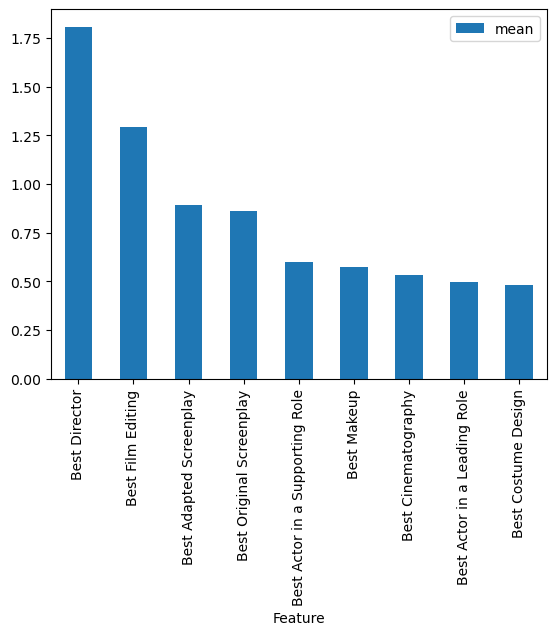

In [14]:
mean_c = feat_df[['Feature','mean']].set_index('Feature').sort_values(by='mean',ascending=False)
mean_c.plot(kind='bar')


In [15]:
mean_c

,mean
Feature,
Best Director,1.807012
Best Film Editing,1.294205
Best Adapted Screenplay,0.891598
Best Original Screenplay,0.862983
Best Actor in a Supporting Role,0.601648
Best Makeup,0.573185
Best Cinematography,0.530142
Best Actor in a Leading Role,0.499088
Best Costume Design,0.480978


## Predicitng Unseen Data

In [16]:
unseen = pd.read_csv(r'C:\Users\kylep\Documents\Work things\Projects\Python\Oscars\osc_2023_data.csv')
unseen.drop(['Unnamed: 0','movie_number',
         'Viewership_Rating','Country of Origin','Production Company','Genre 1','Genre 2','Genre 3',
        'IMDb Rating','Duration','adj_Budget','Winner','Date'], axis=1, inplace=True)
unseen = unseen.set_index('Title')
unseen

,Best Actress in a Leading Role,Best Director,Best Adapted Screenplay,Best Art Direction,Best Actor in a Leading Role,Best Original Screenplay,Best Cinematography,Best Sound Mixing,Best Film Editing,Best Original Song,Best Original Score,Best Actress in a Supporting Role,Best Actor in a Supporting Role,Best Visual Effects,Best Costume Design,Best Foreign Language Film,Best Makeup,Best Sound Editing,Best Animated Feature Film of the Year
Title,,,,,,,,,,,,,,,,,,,
Everything Everywhere All at Once,True,True,False,False,False,True,False,False,True,True,True,True,True,False,True,False,False,False,False
All Quiet on the Western Front,False,False,True,True,False,False,True,True,False,False,True,False,False,True,False,True,True,False,False
Avatar: The Way of Water,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
Elvis,False,False,False,True,True,False,True,True,True,False,False,False,False,False,True,False,True,False,False
The Banshees of Inisherin,False,True,False,False,True,True,False,False,True,False,True,True,True,False,False,False,False,False,False
The Fabelmans,True,True,False,True,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False
Top Gun: Maverick,False,False,True,False,False,False,False,True,True,True,False,False,False,True,False,False,False,False,False
Triangle of Sadness,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
Tár,True,True,False,False,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False


In [17]:
for col in unseen.columns:
    le = LabelEncoder()
    unseen[col] = le.fit_transform(unseen[col])
unseen.head()

,Best Actress in a Leading Role,Best Director,Best Adapted Screenplay,Best Art Direction,Best Actor in a Leading Role,Best Original Screenplay,Best Cinematography,Best Sound Mixing,Best Film Editing,Best Original Song,Best Original Score,Best Actress in a Supporting Role,Best Actor in a Supporting Role,Best Visual Effects,Best Costume Design,Best Foreign Language Film,Best Makeup,Best Sound Editing,Best Animated Feature Film of the Year
Title,,,,,,,,,,,,,,,,,,,
Everything Everywhere All at Once,1,1,0,0,0,1,0,0,1,1,1,1,1,0,1,0,0,0,0
All Quiet on the Western Front,0,0,1,1,0,0,1,1,0,0,1,0,0,1,0,1,1,0,0
Avatar: The Way of Water,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
Elvis,0,0,0,1,1,0,1,1,1,0,0,0,0,0,1,0,1,0,0
The Banshees of Inisherin,0,1,0,0,1,1,0,0,1,0,1,1,1,0,0,0,0,0,0


In [18]:
unseen.index

Index(['Everything Everywhere All at Once', 'All Quiet on the Western Front',
       'Avatar: The Way of Water', 'Elvis', 'The Banshees of Inisherin',
       'The Fabelmans', 'Top Gun: Maverick', 'Triangle of Sadness', 'Tár',
       'Women Talking'],
      dtype='object', name='Title')

In [19]:
pred_unseen = select.predict(unseen)
pred_prob_unseen = select.predict_proba(unseen)[:,1]

print(pred_unseen)
print(pred_prob_unseen)

[0 0 0 0 0 0 0 0 0 0]
[0.43787407 0.02758436 0.00482627 0.11351305 0.43320303 0.11019794
 0.04003374 0.0585872  0.1659065  0.01287995]


In [20]:
unseen_pred = pd.DataFrame({'Proba': pd.Series(pred_prob_unseen)
                            
                           })
                                              
unseen_pred.set_index(unseen.index).sort_values(by='Proba',ascending=False)


,Proba
Title,
Everything Everywhere All at Once,0.437874
The Banshees of Inisherin,0.433203
Tár,0.165906
Elvis,0.113513
The Fabelmans,0.110198
Triangle of Sadness,0.058587
Top Gun: Maverick,0.040034
All Quiet on the Western Front,0.027584
Women Talking,0.012880


In [21]:
winner = unseen_pred.set_index(unseen.index).sort_values(by='Proba',ascending=False)
winner = winner.reset_index()
winner = winner['Title'].head(1).item()
print(f'The movie that has highest probility of winning the 2023 Oscar best picture award is, \033[1m"{winner}"' )

The movie that has highest probility of winning the 2023 Oscar best picture award is, "Everything Everywhere All at Once"


## Decision Tree

In [22]:
X = df.drop(['Date', 'Winner'], axis=1)
y = df['Winner']
Group = df['Date']
X_tr,X_val,y_tr,y_val = train_test_split(X,y,test_size=.2)

In [23]:
from sklearn.ensemble import RandomForestClassifier
sgk =  StratifiedGroupKFold(n_splits=10,shuffle=True, random_state=99)

fold2 = 0
accs2 = []
aucs2 = []
feat_i = []
for train_idx,val_idx in sgk.split(X,y,Group):
    X_tr = X.loc[train_idx]
    y_tr = y.loc[train_idx]
    
    X_val = X.loc[val_idx]
    y_val = y.loc[val_idx] 
    
    #Fit model on Train
    clf = RandomForestClassifier(criterion = 'gini',
                           max_depth = 10,
                           min_samples_split = 10,
                           random_state = 99)
    select2 = RFE(clf, n_features_to_select=8)
    select2.fit(X_tr,y_tr)
    select2.transform(X_tr)
    pred2 = select2.predict(X_val)
    pred_prob2 = select2.predict_proba(X_val)[:,1]
    acc_score2 = accuracy_score(y_val, pred2)
    auc_score2 = roc_auc_score(y_val, pred_prob2)
    print(f"====================================== Fold {fold2} =============================================")
    print(
        f"Our accuracy on the validation set is\033[1m {acc_score2:0.4f}\033[0m and AUC is \033[1m{auc_score2:0.4f}\033[0m")
    #Showing which features were selected
    f_list2 = pd.DataFrame({'Feature': list(X_tr.columns),
                            'Selected': select2.support_,
                            'Ranking': select2.ranking_
                              })
    f_sel2 = f_list2[(f_list2["Selected"] == True)]
    f_sel2  = f_sel2.reset_index(drop='index')
    f_sel2['Feature Importance'] = select2.estimator_.feature_importances_.reshape(8)
    print(f_sel2.sort_values(by='Feature Importance',ascending=False))

    fold2 += 1
    accs2.append(acc_score2)
    aucs2.append(auc_score2)
    feat_i.append(f_sel2[['Feature','Feature Importance']])

====================================== Fold 0 =============================================
Our accuracy on the validation set is 0.8276 and AUC is 0.7990
                           Feature  Selected  Ranking  Feature Importance
5                Best Film Editing      True        1            0.209304
1                    Best Director      True        1            0.190277
3         Best Original Screenplay      True        1            0.123431
6  Best Actor in a Supporting Role      True        1            0.115938
2     Best Actor in a Leading Role      True        1            0.099804
4                Best Sound Mixing      True        1            0.096177
7              Best Costume Design      True        1            0.091414
0   Best Actress in a Leading Role      True        1            0.073656
====================================== Fold 1 =============================================
Our accuracy on the validation set is 0.8929 and AUC is 0.7565
                        

In [24]:
out_of_fold2 = np.mean(aucs2)
avg_acc2 = np.mean(accs2)
print(f'The out of fold AUC is \033[1m{out_of_fold2} \033[0m')
print(f'The average accuracy is \033[1m{avg_acc2} \033[0m')

The out of fold AUC is 0.8350853043229121 
The average accuracy is 0.8455874995615066 


In [25]:
desc = {}
for x in range(len(feat_i)):
    desc[x] = pd.DataFrame(feat_i[x])
feat_df2 = desc[0].merge(desc[1], on='Feature',how='outer') 
for y in range(len(feat_i)-2):
    feat_df2 = feat_df2.merge(desc[y], on='Feature',how='outer') 
feat_df2['mean'] = feat_df2.mean(axis=1)
feat_df2.sort_values(by='mean',ascending=False)

C:\Users\kylep\AppData\Local\Temp\ipykernel_5168\4144435480.py:6: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Feature Importance_x'} in the result is deprecated and will raise a MergeError in a future version.
  feat_df2 = feat_df2.merge(desc[y], on='Feature',how='outer')
C:\Users\kylep\AppData\Local\Temp\ipykernel_5168\4144435480.py:6: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Feature Importance_x'} in the result is deprecated and will raise a MergeError in a future version.
  feat_df2 = feat_df2.merge(desc[y], on='Feature',how='outer')
C:\Users\kylep\AppData\Local\Temp\ipykernel_5168\4144435480.py:6: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Feature Importance_x'} in the result is deprecated and will raise a MergeError in a future version.
  feat_df2 = feat_df2.merge(desc[y], on='Feature',how='outer')
C:\Users\kylep\AppData\Local\Temp\ipykernel_5168\4144435480.py:6: FutureWarning: Passing 'suffixes' which cause dup

,Feature,Feature Importance_x,Feature Importance_y,Feature Importance_x,Feature Importance_y,Feature Importance_x,Feature Importance_y,Feature Importance_x,Feature Importance_y,Feature Importance_x,Feature Importance_y,mean
5,Best Film Editing,0.209304,0.198639,0.209304,0.198639,0.222888,0.176148,0.194018,0.197738,0.188179,0.190489,0.198535
1,Best Director,0.190277,0.216423,0.190277,0.216423,0.179603,0.181639,0.179677,0.206450,0.188063,0.195486,0.194432
3,Best Original Screenplay,0.123431,0.119632,0.123431,0.119632,0.114643,0.121181,0.115388,0.113255,0.122134,0.119343,0.119207
6,Best Actor in a Supporting Role,0.115938,0.099531,0.115938,0.099531,0.111366,0.113230,0.125690,0.107173,0.117044,0.114050,0.111949
2,Best Actor in a Leading Role,0.099804,0.098247,0.099804,0.098247,0.097412,0.097825,0.103101,0.098652,0.095660,0.094749,0.098350
4,Best Sound Mixing,0.096177,NaN,0.096177,NaN,NaN,NaN,0.090983,0.089087,0.101682,0.109270,0.097229
8,Best Cinematography,NaN,0.091034,NaN,0.091034,0.091316,0.119926,0.090469,NaN,NaN,NaN,0.096756
7,Best Costume Design,0.091414,0.085026,0.091414,0.085026,0.097468,0.098047,0.100674,0.109330,0.104453,0.099309,0.096216
0,Best Actress in a Leading Role,0.073656,0.091467,0.073656,0.091467,0.085303,0.092003,NaN,0.078316,0.082784,0.077305,0.082884


<Axes: xlabel='Feature'>

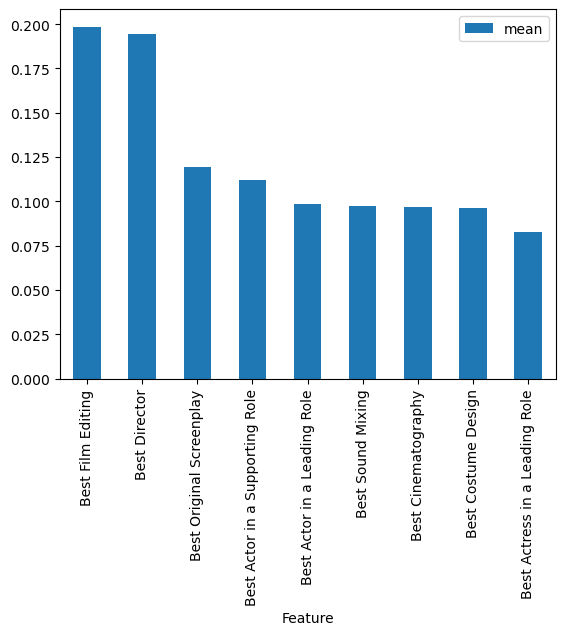

In [26]:
mean_fi = feat_df2[['Feature','mean']].set_index('Feature').sort_values(by='mean',ascending=False)
mean_fi.plot(kind='bar')

## Predicitng Unseen Data

In [27]:
pred_unseen2 = select2.predict(unseen)
pred_prob_unseen2 = select2.predict_proba(unseen)[:,1]

print(pred_unseen2)
print(pred_prob_unseen2)

[0 0 0 0 0 0 0 0 0 0]
[0.38159015 0.         0.00090909 0.04900885 0.21722783 0.15428162
 0.01184149 0.00552489 0.19276551 0.00090909]


In [28]:
unseen_pred2 = pd.DataFrame({'Proba': pd.Series(pred_prob_unseen2)
                            
                           })
                                              
unseen_pred2.set_index(unseen.index).sort_values(by='Proba',ascending=False)


,Proba
Title,
Everything Everywhere All at Once,0.381590
The Banshees of Inisherin,0.217228
Tár,0.192766
The Fabelmans,0.154282
Elvis,0.049009
Top Gun: Maverick,0.011841
Triangle of Sadness,0.005525
Avatar: The Way of Water,0.000909
Women Talking,0.000909


In [29]:
winner_tree = unseen_pred2.set_index(unseen.index).sort_values(by='Proba',ascending=False)
winner_tree = winner_tree.reset_index()
winner_tree = winner_tree['Title'].head(1).item()
print(f'The movie that has highest probility of winning the 2023 Oscar best picture award is, \033[1m"{winner_tree}"' )

The movie that has highest probility of winning the 2023 Oscar best picture award is, "Everything Everywhere All at Once"


# Check to see if I was correct
### https://www.cnbc.com/2023/03/12/oscars-highlights-complete-list-of-winners.html